# Importing Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib
import pynance as py             
import quantstats as qs 

#### Customizing Plots

In [2]:
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)

### Loading the Data

In [3]:
# ============================================
#      Load 1 year of Apple stock data
# ============================================
ticker = "AAPL"
start_date = "2023-01-01"
end_date   = "2023-12-31"

apple = yf.download(ticker, start=start_date, end=end_date, progress=False) 
apple.head()

C:\Users\yamis\AppData\Local\Temp\ipykernel_26316\1110002722.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800


# Cleaning the Data

In [4]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like ('Close', 'AAPL')), flatten them
if isinstance(apple.columns, pd.MultiIndex):
    apple.columns = apple.columns.get_level_values(0)  # keep only first level

print("Cleaned columns:", apple.columns.tolist())

# Optional but recommended: keep track of which stock this is
apple["Ticker"] = ticker

# Ensure index is datetime and sorted properly
apple.index = pd.to_datetime(apple.index)
apple = apple.sort_index()

apple.head()

Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500,AAPL
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,AAPL
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700,AAPL
2023-01-06,127.693581,128.353621,123.033882,124.137239,87754700,AAPL
2023-01-09,128.215714,131.427273,127.959583,128.530965,70790800,AAPL


# Inspection & Validation

In [5]:
print("Data shape:")
print(apple.shape)

print("\nData info:")
print(apple.info())

print("\nMissing values:")
print(apple.isna().sum())

print("\nSummary statistics:")
print(apple.describe())


Data shape:
(250, 6)

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Open    250 non-null    float64
 4   Volume  250 non-null    int64  
 5   Ticker  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB
None

Missing values:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

Summary statistics:
Price       Close        High         Low        Open        Volume
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean   170.510817  171.803593  168.962667  170.222273  5.922355e+07
std     17.340361   17.272208   17.538699   17.536308  1.778332e+07
min    123.161949  125.871079  122.324586  124.137239  2.404830e+07
25%    159.

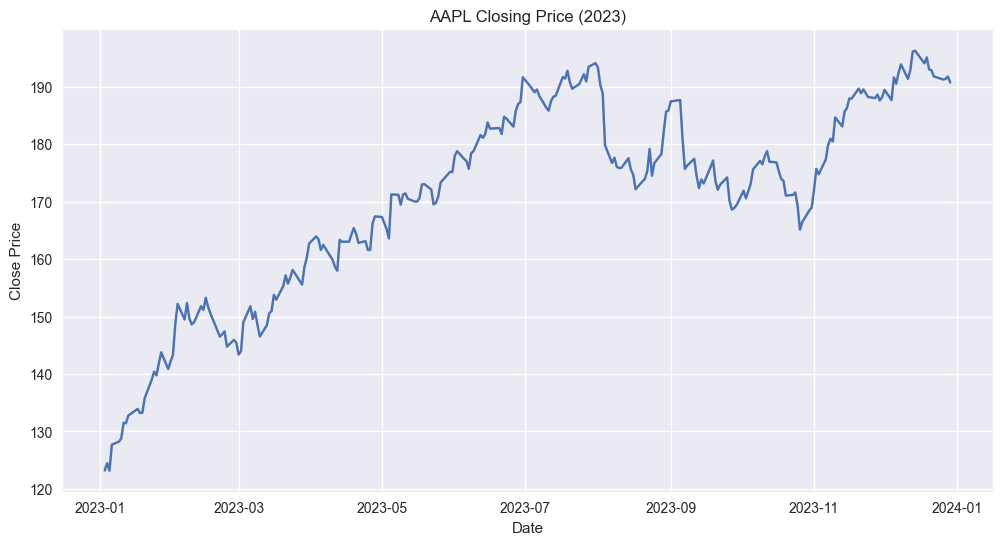

In [6]:
plt.figure(figsize=(12,6))
plt.plot(apple.index, apple["Close"])
plt.title("AAPL Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# TA-Lib Indicators

In [7]:
if "Adj Close" in apple.columns:
    price = apple["Adj Close"]
else:
    price = apple["Close"]

# --- Moving Averages ---
apple["SMA_20"] = talib.SMA(price, timeperiod=20)
apple["SMA_50"] = talib.SMA(price, timeperiod=50)
apple["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
apple["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
apple["MACD"], apple["MACD_signal"], apple["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)

apple.tail()


Price,Close,High,Low,Open,Volume,Ticker,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,AAPL,191.856618,183.572861,191.510231,54.672766,2.633141,3.235256,-0.602116
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,AAPL,192.018094,183.858866,191.484867,53.090037,2.304751,3.049155,-0.744404
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,AAPL,192.154308,184.149424,191.471352,53.354393,2.029102,2.845145,-0.816042
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,AAPL,192.362839,184.479568,191.499694,54.540985,1.823997,2.640915,-0.816918
2023-12-29,190.728790,192.581291,189.936272,192.085968,42672100,AAPL,192.490633,184.814829,191.426275,51.121393,1.559539,2.424640,-0.865101


## Price + Moving Averages Plot

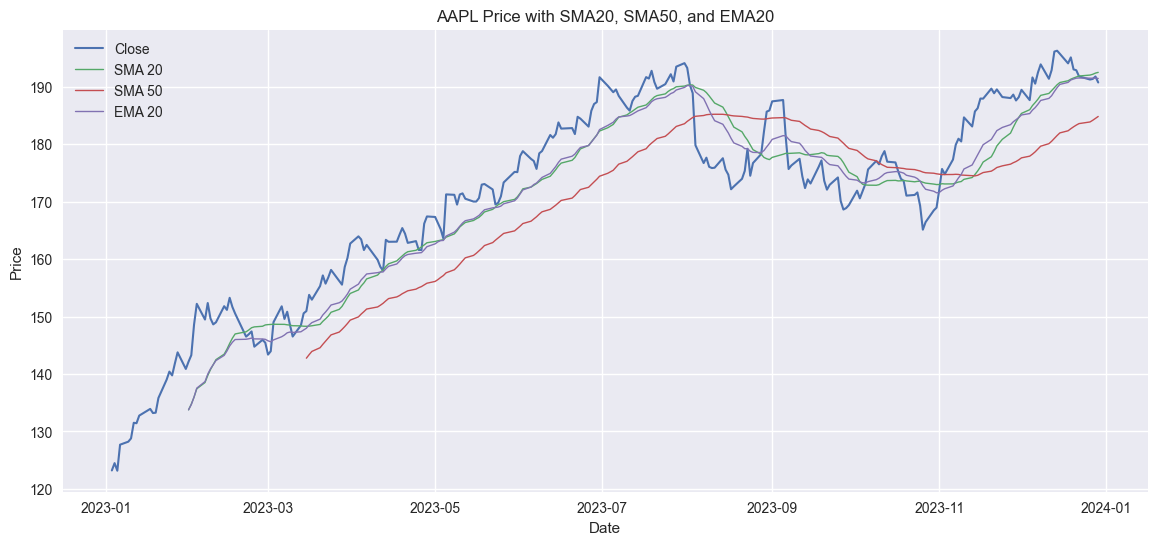

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(apple.index, apple["Close"], label="Close", linewidth=1.5)
plt.plot(apple.index, apple["SMA_20"], label="SMA 20", linewidth=1)
plt.plot(apple.index, apple["SMA_50"], label="SMA 50", linewidth=1)
plt.plot(apple.index, apple["EMA_20"], label="EMA 20", linewidth=1)

plt.title("AAPL Price with SMA20, SMA50, and EMA20")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


## RSI Plot

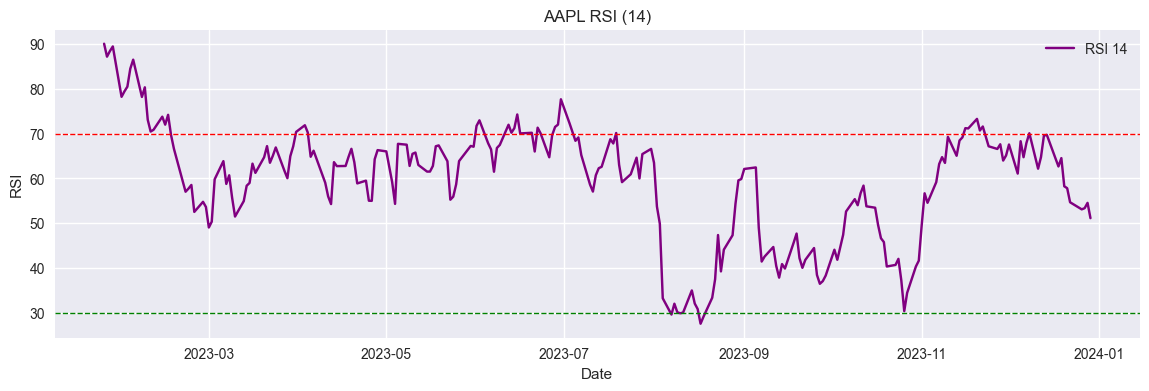

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(apple.index, apple["RSI_14"], label="RSI 14", color="purple")
plt.axhline(70, color="red", linestyle="--", linewidth=1)
plt.axhline(30, color="green", linestyle="--", linewidth=1)

plt.title("AAPL RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


## MACD Plot

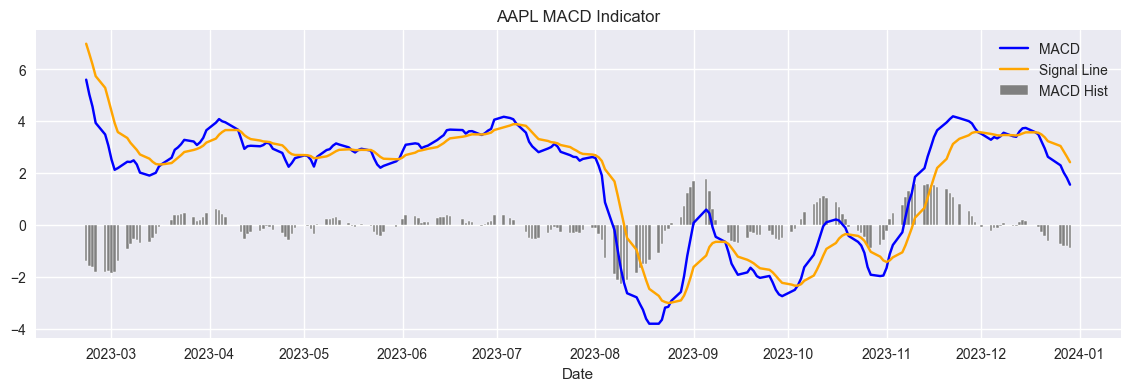

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(apple.index, apple["MACD"], label="MACD", color="blue")
plt.plot(apple.index, apple["MACD_signal"], label="Signal Line", color="orange")
plt.bar(apple.index, apple["MACD_hist"], label="MACD Hist", color="gray")

plt.title("AAPL MACD Indicator")
plt.xlabel("Date")
plt.legend()
plt.show()
